# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import yelp_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities_chosen = pd.DataFrame(cities, columns=['city_name'])
#cities_chosen = cities_chosen.replace[' ', '%20']
cities_chosen.count()


city_name    621
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities_chosen['Latitude'] =''
cities_chosen['Longitude'] = ''
cities_chosen['Temperature'] = ''
cities_chosen['Humidity'] = ''
cities_chosen['Cloudiness'] = ''
cities_chosen['Wind_Speed'] = ''

count_row = 0

print("Beginning Data Retrieval")
print("-----------------------------")

for index, row in cities_chosen.iterrows():
    time.sleep(1)
    
    url = "https://api.openweathermap.org/data/2.5/weather?"
    units = "metric"
    #params = {"q": row["city_name"], "APPID": yelp_key}
    query_url = url + "q=" + str(row["city_name"]) + "&APPID=" + yelp_key + "&units=" + units
    
    
    weather_response = requests.get(query_url)
    weather_data = weather_response.json()
    
    count_row += 1
    
    if weather_response.status_code != requests.codes.ok:
        print(f'Processing Record {str(count_row)} | {row["city_name"]} {weather_response.text}')
        
    else:
        print(f'Processing Record {str(count_row)} | {row["city_name"]}')
        
    try:
        longitude = weather_data['coord']['lon']
        latitude = weather_data['coord']['lat']
        temperature = weather_data["main"]["temp"]
        humidity = weather_data["main"]["humidity"]
        cloudiness = weather_data["clouds"]["all"]
        wind_speed = weather_data["wind"]["speed"]
        
        cities_chosen.at[index,'Longitude'] = longitude
        cities_chosen.at[index,'Latitude'] = latitude
        cities_chosen.at[index,'Temperature'] = temperature
        cities_chosen.at[index, 'Humidity'] = humidity
        cities_chosen.at[index, 'Cloudiness'] = cloudiness
        cities_chosen.at[index, 'Wind_Speed'] = wind_speed
    except:
        print("No weather data")

            
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 | dikson
Processing Record 2 | torbay
Processing Record 3 | yellowknife
Processing Record 4 | tarakan
Processing Record 5 | atuona
Processing Record 6 | yakovlevka
Processing Record 7 | kapaa
Processing Record 8 | belushya guba {"cod":"404","message":"city not found"}
No weather data
Processing Record 9 | buin
Processing Record 10 | marrakesh
Processing Record 11 | avarua
Processing Record 12 | ushuaia
Processing Record 13 | taolanaro {"cod":"404","message":"city not found"}
No weather data
Processing Record 14 | hermanus
Processing Record 15 | rikitea
Processing Record 16 | candolim
Processing Record 17 | hilo
Processing Record 18 | hithadhoo
Processing Record 19 | sisimiut
Processing Record 20 | arlit
Processing Record 21 | ugoofaaru
Processing Record 22 | barentsburg {"cod":"404","message":"city not found"}
No weather data
Processing Record 23 | port blair
Processing Record 24 | kaberamaido
Processing Record 

Processing Record 219 | deputatskiy
Processing Record 220 | atambua
Processing Record 221 | sao miguel do araguaia
Processing Record 222 | male
Processing Record 223 | norman wells
Processing Record 224 | samarinda
Processing Record 225 | rokytne
Processing Record 226 | atar
Processing Record 227 | cockburn town
Processing Record 228 | ust-tsilma
Processing Record 229 | saint-joseph
Processing Record 230 | macon
Processing Record 231 | bengkulu {"cod":"404","message":"city not found"}
No weather data
Processing Record 232 | alekseyevsk
Processing Record 233 | rabo de peixe
Processing Record 234 | vila franca do campo
Processing Record 235 | attawapiskat {"cod":"404","message":"city not found"}
No weather data
Processing Record 236 | san pedro
Processing Record 237 | babu
Processing Record 238 | vao
Processing Record 239 | rungata {"cod":"404","message":"city not found"}
No weather data
Processing Record 240 | sentyabrskiy {"cod":"404","message":"city not found"}
No weather data
Process

Processing Record 426 | ulladulla
Processing Record 427 | zaozerne
Processing Record 428 | ewo
Processing Record 429 | puruaran
Processing Record 430 | keningau
Processing Record 431 | along
Processing Record 432 | diego de almagro
Processing Record 433 | isangel
Processing Record 434 | nguiu {"cod":"404","message":"city not found"}
No weather data
Processing Record 435 | luganville
Processing Record 436 | aasiaat
Processing Record 437 | mezocsat
Processing Record 438 | kadhan
Processing Record 439 | mae sai
Processing Record 440 | celestun
Processing Record 441 | peekskill
Processing Record 442 | north bend
Processing Record 443 | yanan {"cod":"404","message":"city not found"}
No weather data
Processing Record 444 | hofn
Processing Record 445 | kysyl-syr
Processing Record 446 | belawan
Processing Record 447 | bonthe
Processing Record 448 | mendi
Processing Record 449 | namtsy
Processing Record 450 | kolobrzeg
Processing Record 451 | kuching
Processing Record 452 | karratha
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_chosen.to_csv("WeatherData_12_15_2018.csv", index=False)
cities_chosen.dtypes

city_name      object
Latitude       object
Longitude      object
Temperature    object
Humidity       object
Cloudiness     object
Wind_Speed     object
dtype: object

In [8]:
cities_chosen['Latitude'] = pd.to_numeric(cities_chosen['Latitude'],errors='coerce')
cities_chosen['Longitude'] = pd.to_numeric(cities_chosen['Longitude'],errors='coerce')
cities_chosen['Temperature'] = pd.to_numeric(cities_chosen['Temperature'], errors='coerce')
cities_chosen['Humidity'] = pd.to_numeric(cities_chosen['Humidity'], errors='coerce')
cities_chosen['Cloudiness'] = pd.to_numeric(cities_chosen['Cloudiness'], errors='coerce')
cities_chosen['Wind_Speed'] = pd.to_numeric(cities_chosen['Wind_Speed'], errors='coerce')

cities_chosen.dtypes

city_name       object
Latitude       float64
Longitude      float64
Temperature    float64
Humidity       float64
Cloudiness     float64
Wind_Speed     float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

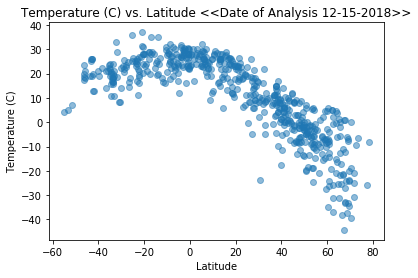

In [9]:
plt.scatter(cities_chosen['Latitude'],cities_chosen['Temperature'], alpha = 0.5)

plt.title("Temperature (C) vs. Latitude <<Date of Analysis 12-15-2018>>")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.savefig("Temperature_vs_Lat.png")
plt.show()

#### Latitude vs. Humidity Plot

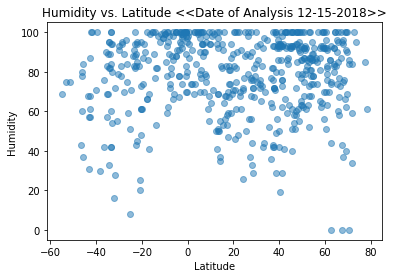

In [10]:
plt.scatter(cities_chosen['Latitude'],cities_chosen['Humidity'], alpha = 0.5)

plt.title("Humidity vs. Latitude <<Date of Analysis 12-15-2018>>")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Humidity_vs_Lat.png")
plt.show()

#### Latitude vs. Cloudiness Plot

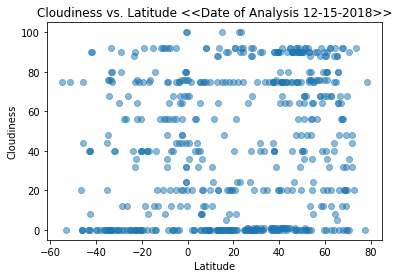

In [11]:
plt.scatter(cities_chosen['Latitude'],cities_chosen['Cloudiness'], alpha = 0.5)

plt.title("Cloudiness vs. Latitude <<Date of Analysis 12-15-2018>>")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness_vs_Lat.png")
plt.show()

#### Latitude vs. Wind Speed Plot

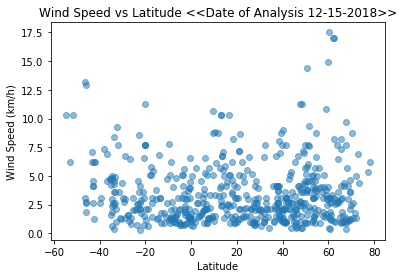

In [13]:
plt.scatter(cities_chosen["Latitude"],cities_chosen["Wind_Speed"], alpha= 0.5)
plt.title("Wind Speed vs Latitude <<Date of Analysis 12-15-2018>>")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.savefig("Wind Speed_vs_Lat.png")
plt.show()

### Analysis
* The data shows that weather is warmer as the equater is approached. However, as it is December, the southern hemisphere is summer so temperatures are above 0 degrees Celcius whereas northern hemisphere is winter so temperatures are colder.
* There is no strong relationship between latitude and humidity. However, it is interesting to see that the equator has a weak relationship to humidity, no matter the latitude, there are cities with 100 humidity.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that cloudiness is very spread out globally. 
* There is no strong relationship between latitude and wind speed. However, it is interesting to see that many some cities have wind stronger than 17.5 km/h 